<a href="https://colab.research.google.com/github/Antonio-Villarreal/Deep-Learning-For-Dummies/blob/main/VGG16_Adaptations_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VGG16 Adaptation

Adapts the VGG16 architecture for a smaller image size - 244 x 244

In [1]:
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator

# load the CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [2]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [3]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [4]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## Model 1

In [5]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.models import Sequential

model = Sequential()

# Layer 1: Convolutional layer with 64 filters, kernel size of 3x3, and 'same' padding
model.add(Conv2D(64, kernel_size=(3, 3), input_shape=(32, 32, 3), padding='same', activation='relu'))

# Layer 2: Convolutional layer with 64 filters, kernel size of 3x3, and 'same' padding
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))

model.add(BatchNormalization())

# Layer 3: Max pooling layer with pool size of 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 4: Convolutional layer with 128 filters, kernel size of 3x3, and 'same' padding
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))

# Layer 5: Convolutional layer with 128 filters, kernel size of 3x3, and 'same' padding
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))

model.add(BatchNormalization())

# Layer 6: Max pooling layer with pool size of 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 7: Convolutional layer with 256 filters, kernel size of 3x3, and 'same' padding
model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))

# Layer 8: Convolutional layer with 256 filters, kernel size of 3x3, and 'same' padding
model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))

# Layer 9: Convolutional layer with 256 filters, kernel size of 3x3, and 'same' padding
model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))

model.add(BatchNormalization())

# Layer 10: Max pooling layer with pool size of 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 11: Flatten layer to convert the 3D feature maps to 1D feature vectors
model.add(Flatten())

# Layer 12: Fully connected layer with 512 units and 'relu' activation
model.add(Dense(512, activation='relu'))

# Layer 13: Fully connected layer with 512 units and 'relu' activation
model.add(Dense(512, activation='relu'))

# Layer 14: Output layer with 'softmax' activation for multi-class classification
model.add(Dense(10, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       1

## Model 2

In [7]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential

model2 = Sequential()

# Layer 1: Convolutional layer with 32 filters, kernel size of 3x3, and 'same' padding
model2.add(Conv2D(32, kernel_size=(3, 3), input_shape=(32, 32, 3), padding='same', activation='relu'))

# Layer 2: Max pooling layer with pool size of 2x2
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 3: Convolutional layer with 64 filters, kernel size of 3x3, and 'same' padding
model2.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))

# Layer 4: Max pooling layer with pool size of 2x2
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 5: Flatten layer to convert the 3D feature maps to 1D feature vectors
model2.add(Flatten())

# Layer 6: Fully connected layer with 128 units and 'relu' activation
model2.add(Dense(128, activation='relu'))

# Layer 7: Output layer with 'softmax' activation for multi-class classification
model2.add(Dense(10, activation='softmax'))

In [8]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4096)              0         
                                                                 
 dense_3 (Dense)             (None, 128)              

## Model 3

In [9]:
model3 = Sequential()

# Layer 1: Convolutional layer with 32 filters, kernel size of 3x3, and 'same' padding
model3.add(Conv2D(32, kernel_size=(3, 3), input_shape=(32, 32, 3), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))

# Layer 2: Convolutional layer with 32 filters, kernel size of 3x3, and 'same' padding
model3.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))

# Layer 3: Max pooling layer with pool size of 2x2
model3.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 4: Convolutional layer with 64 filters, kernel size of 3x3, and 'same' padding
model3.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))

# Layer 5: Convolutional layer with 64 filters, kernel size of 3x3, and 'same' padding
model3.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))

# Layer 6: Max pooling layer with pool size of 2x2
model3.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 7: Convolutional layer with 128 filters, kernel size of 3x3, and 'same' padding
model3.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))

# Layer 8: Flatten layer to convert the 3D feature maps to 1D feature vectors
model3.add(Flatten())

# Layer 9: Fully connected layer with 512 units and 'relu' activation
model3.add(Dense(512, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))

# Layer 10: Fully connected layer with 512 units and 'relu' activation
model3.add(Dense(512, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))

# Layer 11: Output layer with 'softmax' activation for multi-class classification
model3.add(Dense(10, activation='softmax'))

In [10]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_3 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_4 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 32, 32, 32)       

## Model 4 (Imported)

In [11]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions

# base_model = VGG16(include_top=False, input_shape=(32,32,3))
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))

58889256/58889256 [==============================] - 0s 0us/step


In [12]:
# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

In [13]:
# Add new layers
x = base_model.output
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

In [14]:
from keras.models import Model
model4 = Model(inputs=base_model.input, outputs=predictions)

In [15]:
model4.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

## Training

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
Epoch = 20

In [21]:
history = model.fit(x_train, y_train, batch_size=64, epochs=Epoch, validation_data=(x_test, y_test))

Epoch 1/20
782/782 [==============================] - 26s 21ms/step - loss: 1.4322 - accuracy: 0.4884 - val_loss: 1.3653 - val_accuracy: 0.5191
Epoch 2/20
782/782 [==============================] - 16s 20ms/step - loss: 0.8914 - accuracy: 0.6859 - val_loss: 1.0936 - val_accuracy: 0.6363
Epoch 3/20
782/782 [==============================] - 16s 20ms/step - loss: 0.6815 - accuracy: 0.7622 - val_loss: 0.7659 - val_accuracy: 0.7404
Epoch 4/20
782/782 [==============================] - 16s 20ms/step - loss: 0.5549 - accuracy: 0.8085 - val_loss: 0.7886 - val_accuracy: 0.7308
Epoch 5/20
782/782 [==============================] - 16s 20ms/step - loss: 0.4570 - accuracy: 0.8412 - val_loss: 0.7531 - val_accuracy: 0.7504
Epoch 6/20
782/782 [==============================] - 16s 20ms/step - loss: 0.3670 - accuracy: 0.8709 - val_loss: 0.7052 - val_accuracy: 0.7737
Epoch 7/20
782/782 [==============================] - 16s 21ms/step - loss: 0.2906 - accuracy: 0.8991 - val_loss: 0.7181 - val_accuracy:

In [22]:
history2 = model2.fit(x_train, y_train, batch_size=64, epochs=Epoch, validation_data=(x_test, y_test))

Epoch 1/20
782/782 [==============================] - 5s 6ms/step - loss: 1.4698 - accuracy: 0.4730 - val_loss: 1.1678 - val_accuracy: 0.5869
Epoch 2/20
782/782 [==============================] - 4s 5ms/step - loss: 1.0782 - accuracy: 0.6201 - val_loss: 1.0641 - val_accuracy: 0.6366
Epoch 3/20
782/782 [==============================] - 4s 6ms/step - loss: 0.9218 - accuracy: 0.6782 - val_loss: 0.9361 - val_accuracy: 0.6715
Epoch 4/20
782/782 [==============================] - 4s 5ms/step - loss: 0.8226 - accuracy: 0.7128 - val_loss: 0.8843 - val_accuracy: 0.6933
Epoch 5/20
782/782 [==============================] - 4s 5ms/step - loss: 0.7490 - accuracy: 0.7391 - val_loss: 0.9103 - val_accuracy: 0.6860
Epoch 6/20
782/782 [==============================] - 4s 6ms/step - loss: 0.6795 - accuracy: 0.7629 - val_loss: 0.8659 - val_accuracy: 0.7041
Epoch 7/20
782/782 [==============================] - 4s 5ms/step - loss: 0.6137 - accuracy: 0.7876 - val_loss: 0.8860 - val_accuracy: 0.7021
Epoch 

In [23]:
history3 = model3.fit(x_train, y_train, batch_size=64, epochs=Epoch, validation_data=(x_test, y_test))

Epoch 1/20
782/782 [==============================] - 13s 14ms/step - loss: 1.4450 - accuracy: 0.5018 - val_loss: 1.5058 - val_accuracy: 0.5114
Epoch 2/20
782/782 [==============================] - 10s 13ms/step - loss: 0.9197 - accuracy: 0.6767 - val_loss: 1.0724 - val_accuracy: 0.6565
Epoch 3/20
782/782 [==============================] - 10s 13ms/step - loss: 0.7329 - accuracy: 0.7415 - val_loss: 0.8786 - val_accuracy: 0.7160
Epoch 4/20
782/782 [==============================] - 10s 13ms/step - loss: 0.6164 - accuracy: 0.7850 - val_loss: 0.9173 - val_accuracy: 0.7152
Epoch 5/20
782/782 [==============================] - 10s 13ms/step - loss: 0.5267 - accuracy: 0.8143 - val_loss: 1.4030 - val_accuracy: 0.6136
Epoch 6/20
782/782 [==============================] - 10s 13ms/step - loss: 0.4526 - accuracy: 0.8416 - val_loss: 0.7045 - val_accuracy: 0.7787
Epoch 7/20
782/782 [==============================] - 10s 13ms/step - loss: 0.3858 - accuracy: 0.8639 - val_loss: 0.7278 - val_accuracy:

In [24]:
history4 = model4.fit(x_train, y_train, batch_size=64, epochs=Epoch, validation_data=(x_test, y_test))

Epoch 1/20
782/782 [==============================] - 14s 17ms/step - loss: 1.3145 - accuracy: 0.5372 - val_loss: 1.2177 - val_accuracy: 0.5675
Epoch 2/20
782/782 [==============================] - 14s 17ms/step - loss: 1.1368 - accuracy: 0.5987 - val_loss: 1.1816 - val_accuracy: 0.5823
Epoch 3/20
782/782 [==============================] - 13s 17ms/step - loss: 1.0566 - accuracy: 0.6283 - val_loss: 1.1129 - val_accuracy: 0.6121
Epoch 4/20
782/782 [==============================] - 13s 16ms/step - loss: 0.9908 - accuracy: 0.6498 - val_loss: 1.0947 - val_accuracy: 0.6159
Epoch 5/20
782/782 [==============================] - 13s 16ms/step - loss: 0.9305 - accuracy: 0.6723 - val_loss: 1.1531 - val_accuracy: 0.6054
Epoch 6/20
782/782 [==============================] - 13s 16ms/step - loss: 0.8713 - accuracy: 0.6927 - val_loss: 1.0902 - val_accuracy: 0.6223
Epoch 7/20
782/782 [==============================] - 13s 16ms/step - loss: 0.8142 - accuracy: 0.7117 - val_loss: 1.1375 - val_accuracy:

# Analytics

In [25]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [26]:
test_loss4, test_acc4 = model4.evaluate(x_test, y_test, verbose=0)
test_loss3, test_acc3 = model3.evaluate(x_test, y_test, verbose=0)
test_loss2, test_acc2 = model2.evaluate(x_test, y_test, verbose=0)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("Testing Loss Model 1:", test_loss)
print("Testing Accuracy Model 1:", test_acc)
print("Testing Loss Model 2:", test_loss2)
print("Testing Accuracy Model 2:", test_acc2)
print("Testing Loss Model 3:", test_loss3)
print("Testing Accuracy Model 3:", test_acc3)
print("Testing Loss Model 4:", test_loss4)
print("Testing Accuracy Model 4:", test_acc4)

Testing Loss Model 1: 1.5177855491638184
Testing Accuracy Model 1: 0.7910000085830688
Testing Loss Model 2: 1.8168818950653076
Testing Accuracy Model 2: 0.6852999925613403
Testing Loss Model 3: 0.9791887402534485
Testing Accuracy Model 3: 0.7953000068664551
Testing Loss Model 4: 1.6656626462936401
Testing Accuracy Model 4: 0.6195999979972839


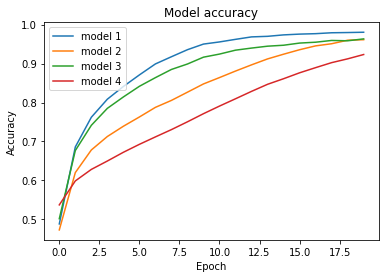

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label="model 1")
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
# plt.show()

model2, = plt.plot(history2.history['accuracy'], label="model 2")
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
# plt.show()

plt.plot(history3.history['accuracy'], label="model 3")
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
# plt.show()

plt.plot(history4.history['accuracy'], label="model 4")
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
leg = plt.legend(loc='upper left')
plt.show()